In [1]:
from tkinter import *
from tkinter import filedialog
import cv2
import PIL
import numpy as np
import matplotlib.pyplot as plt
import import_ipynb
from Utils import *
from Solver import *

importing Jupyter notebook from Utils.ipynb
importing Jupyter notebook from Solver.ipynb


In [2]:
def solve():
    global label
    global button
    global heading
    global frame1
    global sudoku_matrix
    global sudoku
    
    points = []
    for x in range(0, 9):
        for y in range(0, 9):
            if sudoku_matrix[x][y]>0:
                points.append((x, y))
    
    if not isValidSudoku(sudoku_matrix):
        label.grid_forget()
        label = Label(frame1, text = "SORRY MODEL MISREAD DIGITS", bg="black", fg="white", font=("bold", 30))
        label.grid(row=1, column=0)
    
        heading.configure(text="SUDOKU UNSOLVED!!")
        button.configure(text="Solve Another", command = select)
    else:
        solved_sudoku = solve_puzzle(sudoku_matrix)
        for x in range(9):
            for y in range(9):
                if (x, y) in points:
                    solved_sudoku[x][y]=0
        sudoku = display_solution(sudoku, solved_sudoku)
        sudoku_img = PIL.Image.fromarray(sudoku)
        sudoku_img = PIL.ImageTk.PhotoImage(sudoku_img)
        label.grid_forget()
        label = Label(frame1, image=sudoku_img)
        label.photo = sudoku_img
        label.grid(row=1, column=0)
        heading.configure(text="SUDOKU SOLVED!!")
        button.configure(text="Solve Another", command = select)
        
    
def extract():
    global filename
    global label
    global button
    global heading
    global frame1
    global sudoku_matrix
    global sudoku
    
    sudoku, sudoku_matrix = process(filename)
    
    sudoku_img = PIL.Image.fromarray(sudoku)
    sudoku_img = PIL.ImageTk.PhotoImage(sudoku_img)
    
    label.grid_forget()
    label = Label(frame1, image=sudoku_img)
    label.photo = sudoku_img
    label.grid(row=1, column=0)
    
    heading.configure(text="SUDOKU PUZZLE")
    button.configure(text="Solve Sudoku", command = solve)
def select():
    global filename
    global label
    global button
    global heading
    global frame1
    
    filename = filedialog.askopenfilename(initialdir = "/users/Aman Jain/PythonCourse/Machine Learning/Sudoku Solver/Sudoku Images", title="Select Images", filetypes = (("JPEG", "*.jpg"),("PNG", "*.png"),) )
    
    img = PIL.Image.open(filename)
    img = img.resize((450, 450))
    image = PIL.ImageTk.PhotoImage(img)
    
    new_window = Toplevel(root)
    new_window.title("Images")
    new_window.state("zoomed")
    new_window.configure(bg = "black")

    frame1 = LabelFrame(new_window, padx = 20, pady = 20, bg = "black")
    frame1.pack(padx = 50, pady = 50)
    
    heading = Label(frame1, text="ORIGINAL IMAGE", bg="black", fg="white", font=("bold", 40), padx=30, pady=30)
    heading.grid(row=0, column=0)
    
    label = Label(frame1, image=image)
    label.photo = image
    label.grid(row=1, column=0)
    
    button = Button(frame1, text="Extract Sudoku", bg="white", fg="black", border=20, font=("bold", 20), command=extract)
    button.grid(row=2, column=0, padx=20, pady=20)
    
    

1/1 [==============================] - 0s 33ms/step


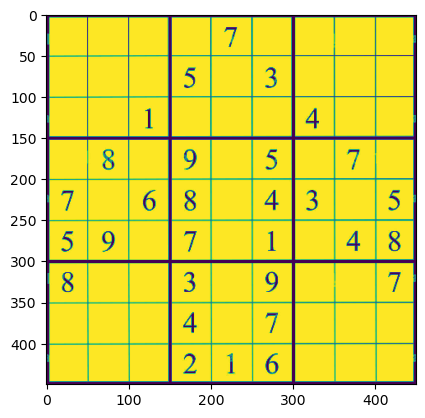

In [14]:
root = Tk()
root.title("Sudoku Solver")
root.state("zoomed")
root.configure(bg="black")

frame = LabelFrame(root, bg="black")
frame.pack(padx=50, pady=50)

rootheading = Label(frame, text="SUDOKU SOLVER", bg="black", fg="white", font=("bold", 70), padx=50, pady=50)
rootheading.grid(row=0, column=0)

rootbutton = Button(frame, text="Select Image", bg="white", fg="black", border=20, font=("bold", 40), command=select)
rootbutton.grid(row=1, column=0, padx=100, pady=100)

root.mainloop()
